# Phát Hiện Gian Lận Thẻ Tín Dụng

## Tổng Quan Dự Án
Gian lận thẻ tín dụng là một vấn đề ngày càng gia tăng trong ngành tài chính. Dự án này tập trung vào việc phát hiện các giao dịch gian lận sử dụng các kỹ thuật học máy tiên tiến. Bằng cách phân tích dữ liệu giao dịch lịch sử, mục tiêu là xây dựng một mô hình có thể xác định và ngăn chặn các hoạt động gian lận một cách chính xác, đồng thời giảm thiểu các trường hợp dương tính giả.


## 1. Tải Dữ Liệu & Nhập Thư Viện
Ở phần này, chúng ta sẽ tải bộ dữ liệu và nhập các thư viện cần thiết. Bước này giúp đảm bảo dữ liệu có sẵn và sẵn sàng cho việc tiền xử lý và phân tích.

- **Libraries**: Pandas, NumPy
- **Actions**: Tải bộ dữ liệu từ CSV hoặc các định dạng khác, kiểm tra vài dòng đầu tiên của dữ liệu và kiểm tra kiểu dữ liệu.

---

In [1]:
import pandas as pd
import numpy as np

train = 'dataset/fraud_detection/fraudTrain.csv'
test = 'dataset/fraud_detection/fraudTest.csv'
try:
    data_train = pd.read_csv(train)
    data_test = pd.read_csv(test)
    print(f"Tải dữ liệu thành công! Số lượng dòng: {len(data_train)}, số lượng cột: {len(data_train.columns)}") 
    print(f"Tải dữ liệu thành công! Số lượng dòng: {len(data_test)}, số lượng cột: {len(data_test.columns)}") 
except FileNotFoundError as e:
    print(f"Lỗi: {e}")
    exit()  # Kết thúc chương trình nếu không tìm thấy tệp


Tải dữ liệu thành công! Số lượng dòng: 1296675, số lượng cột: 23
Tải dữ liệu thành công! Số lượng dòng: 555719, số lượng cột: 23


In [2]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [3]:
data_train.head

<bound method NDFrame.head of          Unnamed: 0 trans_date_trans_time               cc_num  \
0                 0   2019-01-01 00:00:18     2703186189652095   
1                 1   2019-01-01 00:00:44         630423337322   
2                 2   2019-01-01 00:00:51       38859492057661   
3                 3   2019-01-01 00:01:16     3534093764340240   
4                 4   2019-01-01 00:03:06      375534208663984   
...             ...                   ...                  ...   
1296670     1296670   2020-06-21 12:12:08       30263540414123   
1296671     1296671   2020-06-21 12:12:19     6011149206456997   
1296672     1296672   2020-06-21 12:12:32     3514865930894695   
1296673     1296673   2020-06-21 12:13:36     2720012583106919   
1296674     1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97   
1            fraud_Heller, Gutmann 

In [4]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [5]:
data_test.head

<bound method NDFrame.head of         Unnamed: 0 trans_date_trans_time            cc_num  \
0                0   2020-06-21 12:14:25  2291163933867244   
1                1   2020-06-21 12:14:33  3573030041201292   
2                2   2020-06-21 12:14:53  3598215285024754   
3                3   2020-06-21 12:15:15  3591919803438423   
4                4   2020-06-21 12:15:17  3526826139003047   
...            ...                   ...               ...   
555714      555714   2020-12-31 23:59:07    30560609640617   
555715      555715   2020-12-31 23:59:09  3556613125071656   
555716      555716   2020-12-31 23:59:15  6011724471098086   
555717      555717   2020-12-31 23:59:24     4079773899158   
555718      555718   2020-12-31 23:59:34  4170689372027579   

                                    merchant        category     amt    first  \
0                      fraud_Kirlin and Sons   personal_care    2.86     Jeff   
1                       fraud_Sporer-Keebler   personal_care   

Số lượng cột giống nhau:
Cả hai bộ dữ liệu đều có cùng số lượng cột, điều này đảm bảo rằng mô hình có thể học từ bộ train và áp dụng trực tiếp vào bộ test mà không cần điều chỉnh cấu trúc dữ liệu. Đây là một yêu cầu quan trọng để đảm bảo tính nhất quán trong quá trình huấn luyện và đánh giá mô hình.

Phân chia theo thời gian:

Bộ Train: Gồm dữ liệu từ ngày 2019-01-01 đến 2020-06-21, chiếm khoảng 1 năm rưỡi. Đây là khoảng thời gian đủ dài để mô hình có thể học được các xu hướng và đặc điểm trong dữ liệu, đặc biệt đối với các bài toán liên quan đến chuỗi thời gian.
Bộ Test: Gồm dữ liệu từ ngày 2020-06-21 đến 2020-12-31, kéo dài hơn 6 tháng. Khoảng thời gian này đủ để đánh giá độ chính xác của mô hình trên dữ liệu mới và đảm bảo rằng mô hình không bị overfitting.
Ý nghĩa của phân chia thời gian:

Phân chia theo thời gian như vậy phù hợp với các bài toán dự đoán hoặc phân tích dữ liệu thời gian (time series). Mô hình học từ bộ train sẽ dự đoán dữ liệu tương lai trên bộ test.
Đảm bảo rằng bộ test không chứa thông tin từ tương lai trong giai đoạn train, giúp đánh giá khách quan hiệu suất của mô hình khi áp dụng vào dữ liệu thực tế.

In [6]:
data_train.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [7]:
data_train.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

## 2. Tiền Xử Lý Dữ Liệu
Dọn dẹp dữ liệu là bước quan trọng để đảm bảo đầu vào chất lượng cao cho các mô hình học máy. Phần này sẽ tập trung vào việc xử lý giá trị thiếu, ngoại lệ và biến đổi dữ liệu.

1. **Xử lý dữ liệu thiếu và dị biệt**
2. **Loại bỏ các bản sao, nếu có**
3. **Chuyển các tính năng phân loại thành định dạng số (ví dụ: sử dụng mã hóa nhãn hoặc mã hóa one-hot)**

In [8]:
from sklearn.preprocessing import LabelEncoder

def preprocess_fraud_detection(data):
    df = data.copy()
    # 1. Chuyển đổi cột thời gian sang dạng datetime
    df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
    df['dob'] = pd.to_datetime(df['dob'])
    
    # 2. Tạo đặc trưng mới:
    # Tính tuổi khách hàng
    df['age'] = df['trans_date_trans_time'].dt.year - df['dob'].dt.year
    df['age'] -= ((df['trans_date_trans_time'].dt.month < df['dob'].dt.month) | 
                  ((df['trans_date_trans_time'].dt.month == df['dob'].dt.month) & 
                   (df['trans_date_trans_time'].dt.day < df['dob'].dt.day)))
    
    # Trích xuất giờ, ngày, và ngày trong tuần từ thời gian giao dịch
    df['hour'] = df['trans_date_trans_time'].dt.hour
    df['day'] = df['trans_date_trans_time'].dt.day
    df['weekday'] = df['trans_date_trans_time'].dt.weekday  # 0: Monday, 6: Sunday
    df['month'] = df['trans_date_trans_time'].dt.month
    df['year'] = df['trans_date_trans_time'].dt.year
    
    
    # Khoảng cách giữa vị trí giao dịch và địa chỉ của khách hàng
    df['distance'] = np.sqrt((df['lat'] - df['merch_lat'])**2 + (df['long'] - df['merch_long'])**2)
    
    # 3. Loại bỏ các cột không cần thiết
    df.drop(['Unnamed: 0', 'trans_num', 'first', 'last', 'street', 'city', 'dob', 
             'merchant', 'unix_time', 'trans_date_trans_time', 'job'], axis=1, inplace=True)
    
    # 4. Mã hóa các cột phân loại bằng LabelEncoder
    label_enc = LabelEncoder()
    for col in ['category', 'gender', 'state']:
        df[col] = label_enc.fit_transform(df[col])
    
    # 5. Xử lý giá trị thiếu (nếu có)
    if df.isnull().values.any():
        df.fillna(-1, inplace=True)  # Điền giá trị mặc định
    
    return df


# Xử lý dữ liệu
train_preprocessed = preprocess_fraud_detection(data_train)
test_preprocessed = preprocess_fraud_detection(data_test)

# Hiển thị thông tin sau khi xử lý
print(train_preprocessed.head())


             cc_num  category     amt  gender  state    zip      lat  \
0  2703186189652095         8    4.97       0     27  28654  36.0788   
1      630423337322         4  107.23       0     47  99160  48.8878   
2    38859492057661         0  220.11       1     13  83252  42.1808   
3  3534093764340240         2   45.00       1     26  59632  46.2306   
4   375534208663984         9   41.96       1     45  24433  38.4207   

       long  city_pop  merch_lat  merch_long  is_fraud  age  hour  day  \
0  -81.1781      3495  36.011293  -82.048315         0   30     0    1   
1 -118.2105       149  49.159047 -118.186462         0   40     0    1   
2 -112.2620      4154  43.150704 -112.154481         0   56     0    1   
3 -112.1138      1939  47.034331 -112.561071         0   51     0    1   
4  -79.4629        99  38.674999  -78.632459         0   32     0    1   

   weekday  month  year  distance  
0        1      1  2019  0.872830  
1        1      1  2019  0.272310  
2        1    

In [9]:
train_preprocessed.dtypes

cc_num          int64
category        int64
amt           float64
gender          int64
state           int64
zip             int64
lat           float64
long          float64
city_pop        int64
merch_lat     float64
merch_long    float64
is_fraud        int64
age             int32
hour            int32
day             int32
weekday         int32
month           int32
year            int32
distance      float64
dtype: object

In [10]:
import pandas as pd
import numpy as np

# Hàm phát hiện ngoại lệ sử dụng IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Hàm xử lý ngoại lệ cho các cột số
def handle_outliers(df):
    columns_to_check = ['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'age']
    
    for column in columns_to_check:
        # Phát hiện ngoại lệ
        outliers, lower_bound, upper_bound = detect_outliers_iqr(df, column)
        print(f"Phát hiện {len(outliers)} ngoại lệ trong cột {column}")
        
        # Loại bỏ ngoại lệ
        # df = df[~df[column].isin(outliers[column])]
        
        # Thay thế ngoại lệ bằng giá trị trung bình
        mean_value = df[column].mean()
        df[column] = df[column].apply(lambda x: mean_value if x < lower_bound or x > upper_bound else x)
    
    return df

# Giả sử bạn đã có dữ liệu đã xử lý ban đầu (train_preprocessed)
train_preprocessed_no_outliers = handle_outliers(train_preprocessed)

# Hiển thị số lượng dữ liệu sau khi xử lý ngoại lệ
print(f"Số lượng dữ liệu sau khi loại bỏ ngoại lệ: {len(train_preprocessed_no_outliers)}")


Phát hiện 67290 ngoại lệ trong cột amt
Phát hiện 4679 ngoại lệ trong cột lat
Phát hiện 49922 ngoại lệ trong cột long
Phát hiện 242674 ngoại lệ trong cột city_pop
Phát hiện 4967 ngoại lệ trong cột merch_lat
Phát hiện 41994 ngoại lệ trong cột merch_long
Phát hiện 236 ngoại lệ trong cột age
Số lượng dữ liệu sau khi loại bỏ ngoại lệ: 1296675


In [11]:
# Giả sử bạn đã có dữ liệu đã xử lý ban đầu (train_preprocessed)
test_preprocessed_no_outliers = handle_outliers(test_preprocessed)

# Hiển thị số lượng dữ liệu sau khi xử lý ngoại lệ
print(f"Số lượng dữ liệu sau khi loại bỏ ngoại lệ: {len(test_preprocessed_no_outliers)}")


Phát hiện 27778 ngoại lệ trong cột amt
Phát hiện 1933 ngoại lệ trong cột lat
Phát hiện 21104 ngoại lệ trong cột long
Phát hiện 104151 ngoại lệ trong cột city_pop
Phát hiện 2090 ngoại lệ trong cột merch_lat
Phát hiện 17926 ngoại lệ trong cột merch_long
Phát hiện 78 ngoại lệ trong cột age
Số lượng dữ liệu sau khi loại bỏ ngoại lệ: 555719


In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

def preprocess_data(train, test, n_components=0.95):
    """
    Hàm xử lý dữ liệu cho tập huấn luyện và kiểm tra:
    1. Chuẩn hóa dữ liệu
    2. Áp dụng PCA để giảm chiều dữ liệu
    Trả về dữ liệu gốc, đã chuẩn hóa và đã giảm chiều.
    """
    # Tách X (đặc trưng) và y (nhãn) từ tập huấn luyện
    X_train = train.drop(columns=['is_fraud'])
    y_train = train['is_fraud']
    
    X_test = test.drop(columns=['is_fraud'])
    y_test = test['is_fraud']
    
    # Dữ liệu gốc
    X_train_original = X_train.copy()
    X_test_original = X_test.copy()

    # Chuẩn hóa dữ liệu
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)  # Lưu ý: dùng fit_transform chỉ trên tập train
    
    # Áp dụng PCA để giảm chiều dữ liệu
    pca = PCA(n_components=n_components)  # Giữ lại 95% phương sai
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)  # Chỉ dùng transform cho tập test
    
    # In số lượng đặc trưng trước và sau PCA
    print(f"Số lượng đặc trưng ban đầu (Train): {X_train.shape[1]}")
    print(f"Số lượng đặc trưng sau PCA (Train): {X_train_pca.shape[1]}")
    print(f"Số lượng đặc trưng sau PCA (Test): {X_test_pca.shape[1]}")
    
    return X_train_original, X_train_scaled, X_train_pca, X_test_original, X_test_scaled, X_test_pca, y_train, y_test

# Ví dụ sử dụng hàm:
X_train_original, X_train_scaled, X_train_pca, X_test_original, X_test_scaled, X_test_pca, y_train, y_test = preprocess_data(train_preprocessed_no_outliers, test_preprocessed_no_outliers)


Số lượng đặc trưng ban đầu (Train): 18
Số lượng đặc trưng sau PCA (Train): 14
Số lượng đặc trưng sau PCA (Test): 14



## 3. Phân Tích Dữ Liệu (EDA)
Bước này, chúng ta sẽ khám phá bộ dữ liệu để phát hiện các mẫu và xu hướng có thể giúp trong việc xây dựng mô hình

- **Actions**:
  - Trực quan hóa sự phân bố các tính năng
  - Điều tra sự phân bố lớp (gian lận vs giao dịch hợp pháp)
  - Xác định mối quan hệ giữa các tính năng
  - Phân tích ngoại lệ, đặc biệt là đối với số tiền giao dịch

---

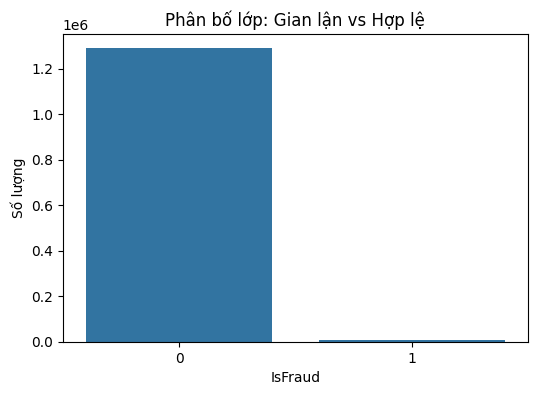

is_fraud
0    0.994211
1    0.005789
Name: proportion, dtype: float64


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Phân bố lớp (gian lận vs hợp pháp)
plt.figure(figsize=(6, 4))
sns.countplot(x='is_fraud', data=train_preprocessed_no_outliers)  # Chỉnh lại tên cột là 'is_fraud'
plt.title('Phân bố lớp: Gian lận vs Hợp lệ')
plt.xlabel('IsFraud')
plt.ylabel('Số lượng')
plt.show()

# Tính tỷ lệ phân bố các lớp
print(train_preprocessed_no_outliers['is_fraud'].value_counts(normalize=True))


Biểu đồ hiển thị sự phân bố của nhãn cần dự đoán.
Nhận xét: Giao dịch không gian lận chiếm 99.5%, trong khi giao dịch gian lận chỉ chiếm 0.5%.
Điều này gây khó khăn do sự mất cân bằng dữ liệu, đồng thời cho thấy gian lận là hiện tượng hiếm gặp. Có thể yêu cầu kỹ thuật như resampling hoặc weight balancing để cải thiện hiệu suất mô hình.

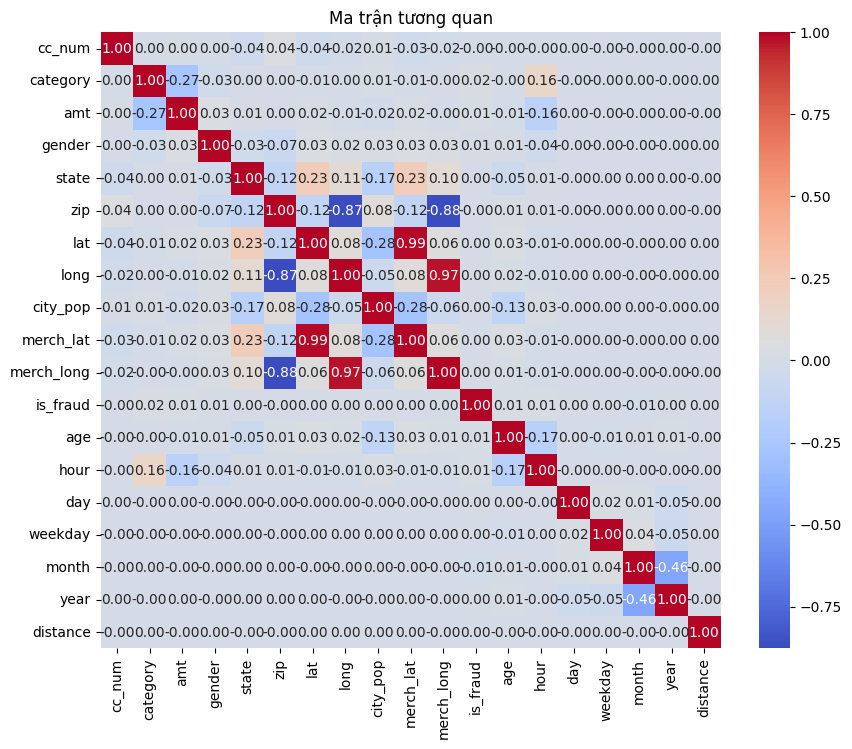

In [17]:
correlation_matrix = train_preprocessed_no_outliers.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Ma trận tương quan')
plt.show()


Heatmap: Tương quan giữa các biến số
Tính toán ma trận tương quan để tìm mối quan hệ giữa các biến.
Phân tích sơ bộ từ Heatmap
Mối quan tâm chính: is_fraud
Biến nào có tương quan mạnh (dương hoặc âm) với is_fraud? Nếu giá trị tương quan > 0.2 hoặc < -0.2, chúng có thể quan trọng trong việc phát hiện gian lận.
Từ biểu đồ, các biến như amt, distance, hoặc hour có thể liên quan.
Các biến liên quan khác:
Cặp biến có tương quan rất cao gần giá trị 1 (chẳng hạn: lat và merch_lat, hoặc long và merch_long) có thể dẫn đến vấn đề đa cộng tuyến. Điều này cần được xem xét khi xây dựng mô hình.

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

class EDA:
    def __init__(self, df):
        """
        Khởi tạo đối tượng phân tích EDA.
        Args:
            df (DataFrame): Dữ liệu cần phân tích.
        """
        self.df = df

    def normalize_column(self, columns):
        """
        Chuẩn hóa các cột bằng MinMaxScaler.
        Args:
            columns (list): Danh sách các cột cần chuẩn hóa.
        """
        scaler = MinMaxScaler()
        self.df[columns] = scaler.fit_transform(self.df[columns])
        print(f"Đã chuẩn hóa các cột: {columns}")

    def remove_outliers(self, column, method="iqr", threshold=1.5):
        """
        Loại bỏ giá trị ngoại lệ trong một cột.
        Args:
            column (str): Tên cột cần xử lý.
            method (str): Phương pháp xử lý ('iqr' hoặc 'zscore').
            threshold (float): Ngưỡng để xác định ngoại lệ.
        """
        if method == "iqr":
            Q1 = self.df[column].quantile(0.25)
            Q3 = self.df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR
            self.df = self.df[(self.df[column] >= lower_bound) & (self.df[column] <= upper_bound)]
        elif method == "zscore":
            from scipy.stats import zscore
            self.df = self.df[np.abs(zscore(self.df[column])) < threshold]
        else:
            raise ValueError("Phương pháp phải là 'iqr' hoặc 'zscore'")
        print(f"Đã loại bỏ ngoại lệ từ cột {column} bằng phương pháp {method}.")
        
    def plot_categorical(self, column, hue=None, title=None):
        """
        Vẽ biểu đồ phân phối cho biến phân loại.
        Args:
            column (str): Tên cột cần vẽ.
            hue (str): Cột dùng để phân nhóm (nếu có).
            title (str): Tiêu đề biểu đồ.
        """
        sns.countplot(x=column, hue=hue, data=self.df, order=self.df[column].value_counts().index)
        plt.title(title or f'Phân phối của {column}')
        plt.xlabel(column)
        plt.ylabel('Tần suất')
        plt.xticks(rotation=45)
        plt.legend(title=hue)
        plt.show()

    def plot_numerical(self, column, by=None, plot_type='kde', title=None):
        """
        Vẽ biểu đồ phân phối cho biến số.
        Args:
            column (str): Tên cột cần vẽ.
            by (str): Phân phối theo cột (nếu có).
            plot_type (str): Loại biểu đồ ('kde', 'box', 'hist').
            title (str): Tiêu đề biểu đồ.
        """
        if plot_type == 'kde':
            sns.kdeplot(data=self.df, x=column, hue=by, fill=True)
        elif plot_type == 'box':
            sns.boxplot(data=self.df, x=by, y=column)
        elif plot_type == 'hist':
            sns.histplot(data=self.df, x=column, hue=by, kde=True, bins=30)
        else:
            raise ValueError("plot_type phải là 'kde', 'box', hoặc 'hist'")

        plt.title(title or f'Phân phối của {column}')
        plt.xlabel(column)
        plt.ylabel('Tần suất')
        plt.show()

    def plot_correlation(self, figsize=(10, 8)):
        """
        Vẽ ma trận tương quan giữa các biến số.
        Args:
            figsize (tuple): Kích thước biểu đồ.
        """
        corr_matrix = self.df.corr()
        plt.figure(figsize=figsize)
        sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
        plt.title('Ma trận tương quan')
        plt.show()

    def scatter_plot(self, x, y, hue=None, title=None):
        """
        Vẽ biểu đồ scatter để xem mối quan hệ giữa hai biến.
        Args:
            x (str): Biến trên trục X.
            y (str): Biến trên trục Y.
            hue (str): Phân nhóm theo cột (nếu có).
            title (str): Tiêu đề biểu đồ.
        """
        sns.scatterplot(data=self.df, x=x, y=y, hue=hue, alpha=0.6)
        plt.title(title or f'Mối quan hệ giữa {x} và {y}')
        plt.xlabel(x)
        plt.ylabel(y)
        plt.legend(title=hue)
        plt.show()

    def plot_time_trends(self, time_column, target_column, agg_func="count", freq="D"):
        """
        Vẽ xu hướng thời gian cho dữ liệu.
        Args:
            time_column (str): Tên cột chứa thời gian (datetime).
            target_column (str): Cột để tính toán (vd: 'is_fraud', 'amt').
            agg_func (str): Hàm tính toán ('count', 'sum', 'mean').
            freq (str): Tần suất ('D' - ngày, 'M' - tháng, 'Y' - năm).
        """
        self.df[time_column] = pd.to_datetime(self.df[time_column])
        time_data = self.df.groupby(pd.Grouper(key=time_column, freq=freq))[target_column].agg(agg_func).reset_index()

        plt.figure(figsize=(10, 6))
        sns.lineplot(data=time_data, x=time_column, y=target_column)
        plt.title(f"Xu hướng {target_column} theo thời gian ({freq})")
        plt.xlabel("Thời gian")
        plt.ylabel(target_column)
        plt.xticks(rotation=45)
        plt.show()


df = train_preprocessed.copy()

# Khởi tạo class
eda = EDA(df)


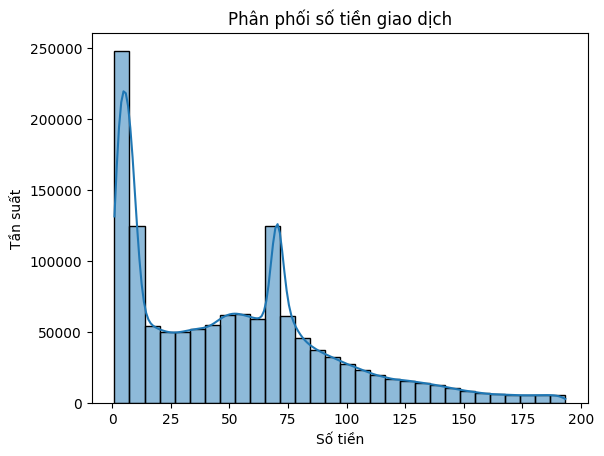

In [19]:
sns.histplot(train_preprocessed_no_outliers['amt'], bins=30, kde=True)
plt.title('Phân phối số tiền giao dịch')
plt.xlabel('Số tiền')
plt.ylabel('Tần suất')
plt.show()


Biểu đồ phân phối: Số tiền giao dịch (amt)
Kiểm tra phân phối của cột amt.
Dùng histogram với KDE (Kernel Density Estimate).
Phân tích: Xem phân phối có bị lệch hay có giá trị bất thường (outliers).

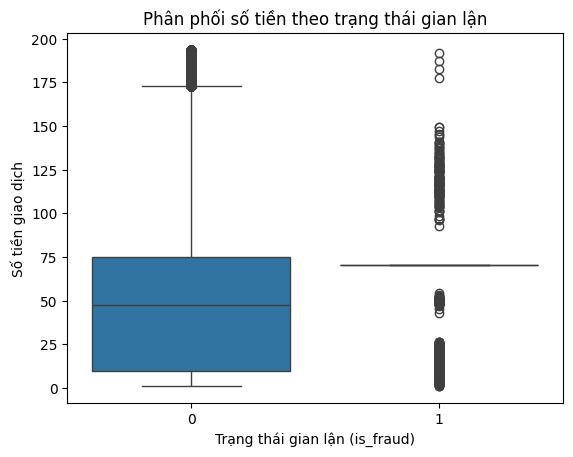

In [20]:
sns.boxplot(data=train_preprocessed_no_outliers, x='is_fraud', y='amt')
plt.title('Phân phối số tiền theo trạng thái gian lận')
plt.xlabel('Trạng thái gian lận (is_fraud)')
plt.ylabel('Số tiền giao dịch')
plt.show()

Biểu đồ hộp: Số tiền và gian lận (is_fraud)
Kiểm tra sự khác biệt về số tiền giữa giao dịch gian lận (is_fraud=1) và không gian lận (is_fraud=0).
Phân tích: Xem các giao dịch gian lận thường có giá trị lớn hay nhỏ so với các giao dịch bình thường.


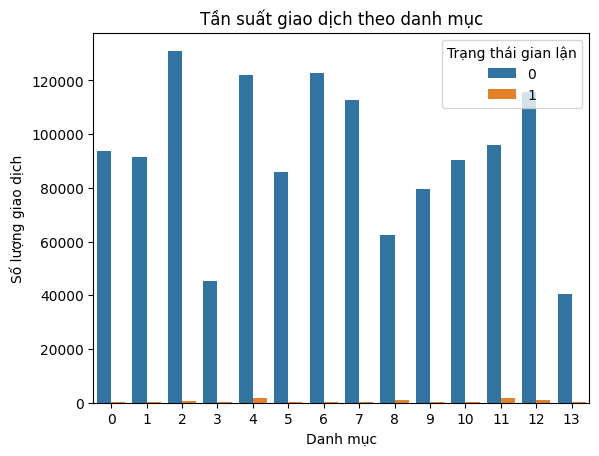

In [21]:
sns.countplot(data=train_preprocessed_no_outliers, x='category', hue='is_fraud')
plt.title('Tần suất giao dịch theo danh mục')
plt.xlabel('Danh mục')
plt.ylabel('Số lượng giao dịch')
plt.legend(title='Trạng thái gian lận')
plt.show()


Biểu đồ thanh: Tần suất giao dịch theo danh mục (category)
Kiểm tra tần suất giao dịch trong từng danh mục và chia theo trạng thái gian lận.
Phân tích: Tìm ra danh mục có tỷ lệ giao dịch gian lận cao nhất.

d:\Project\credit-card-fraud-detection\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


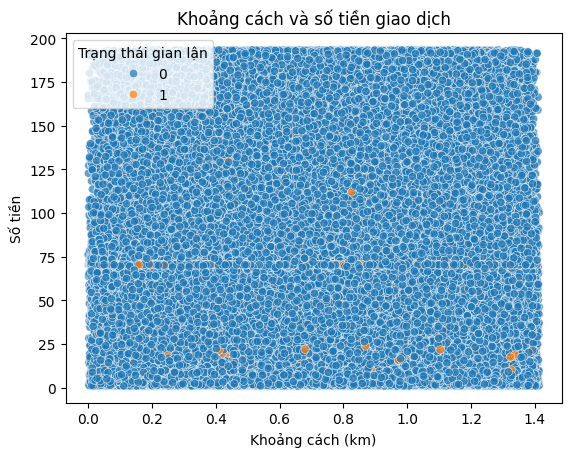

In [22]:
sns.scatterplot(data=train_preprocessed_no_outliers, x='distance', y='amt', hue='is_fraud', alpha=0.7)
plt.title('Khoảng cách và số tiền giao dịch')
plt.xlabel('Khoảng cách (km)')
plt.ylabel('Số tiền')
plt.legend(title='Trạng thái gian lận')
plt.show()


Biểu đồ phân tán: Khoảng cách giao dịch (distance) và số tiền (amt)
Xem mối quan hệ giữa khoảng cách và số tiền giao dịch.
Phân tích: Các giao dịch gian lận thường xảy ra ở khoảng cách xa hay gần? Giá trị tiền giao dịch có bị ảnh hưởng?

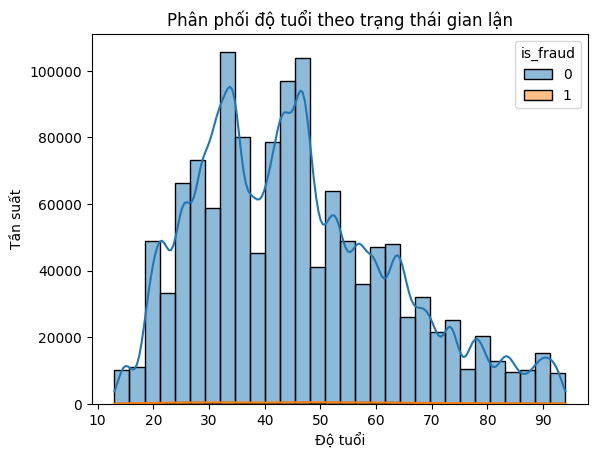

In [23]:
sns.histplot(data=train_preprocessed_no_outliers, x='age', hue='is_fraud', kde=True, bins=30)
plt.title('Phân phối độ tuổi theo trạng thái gian lận')
plt.xlabel('Độ tuổi')
plt.ylabel('Tần suất')
plt.show()


Phân phối độ tuổi (age) theo trạng thái gian lận
Xem độ tuổi nào thường liên quan đến gian lận.
Phân tích: Độ tuổi nào dễ bị gian lận nhất?

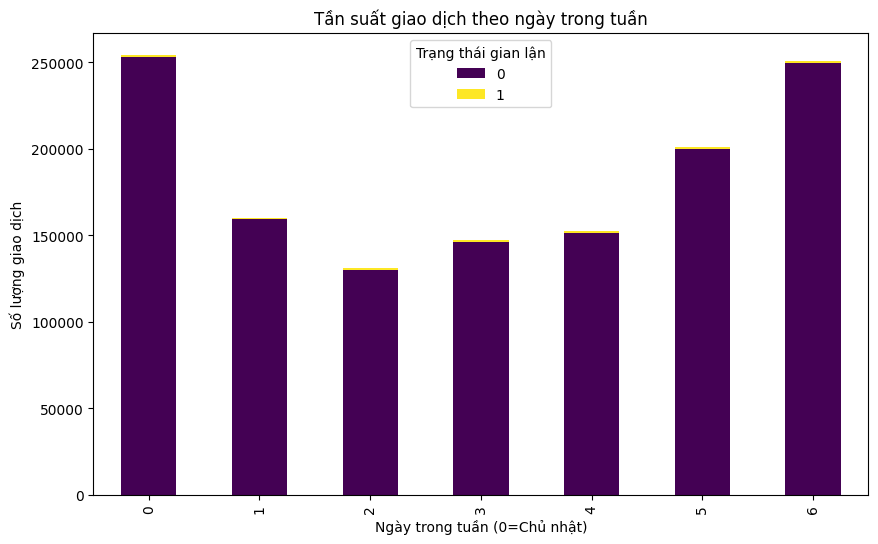

In [24]:
df_weekday = train_preprocessed_no_outliers.groupby(['weekday', 'is_fraud']).size().unstack()
df_weekday.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Tần suất giao dịch theo ngày trong tuần')
plt.xlabel('Ngày trong tuần (0=Chủ nhật)')
plt.ylabel('Số lượng giao dịch')
plt.legend(title='Trạng thái gian lận')
plt.show()


Biểu đồ cột chồng: Tần suất giao dịch theo ngày trong tuần (weekday)
Xem giao dịch gian lận và không gian lận diễn ra trong ngày nào nhiều nhất.
Phân tích: Ngày nào trong tuần thường xảy ra giao dịch gian lận?

C:\Users\SingPC\AppData\Local\Temp\ipykernel_12532\3689752898.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Trạng thái gian lận')


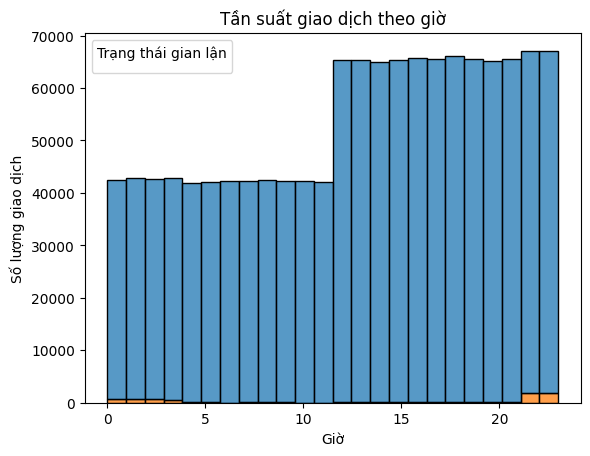

In [25]:
sns.histplot(data=train_preprocessed_no_outliers, x='hour', hue='is_fraud', bins=24, kde=False, multiple="stack")
plt.title('Tần suất giao dịch theo giờ')
plt.xlabel('Giờ')
plt.ylabel('Số lượng giao dịch')
plt.legend(title='Trạng thái gian lận')
plt.show()


Tần suất giao dịch theo giờ (hour)
Xem các giao dịch gian lận thường diễn ra vào khung giờ nào.

Phân tích: Giao dịch gian lận thường xảy ra vào ban ngày hay ban đêm?

d:\Project\credit-card-fraud-detection\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


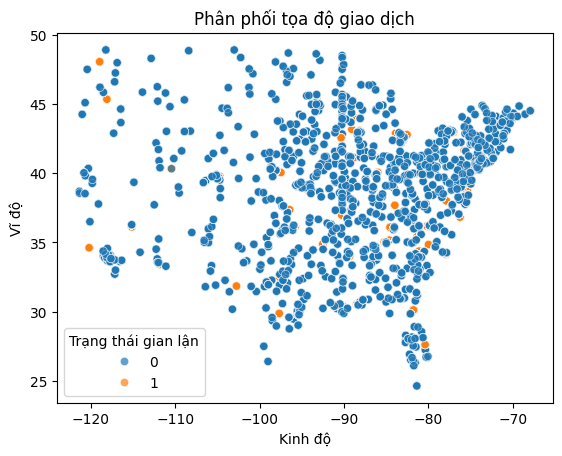

In [26]:
sns.scatterplot(data=train_preprocessed_no_outliers, x='long', y='lat', hue='is_fraud', alpha=0.7)
plt.title('Phân phối tọa độ giao dịch')
plt.xlabel('Kinh độ')
plt.ylabel('Vĩ độ')
plt.legend(title='Trạng thái gian lận')
plt.show()


Biểu đồ phân tán: Tọa độ giao dịch (lat, long)
Kiểm tra xem các giao dịch gian lận có tập trung ở khu vực địa lý nào.
Phân tích: Giao dịch gian lận có phân bố đều hay tập trung vào một số vùng?

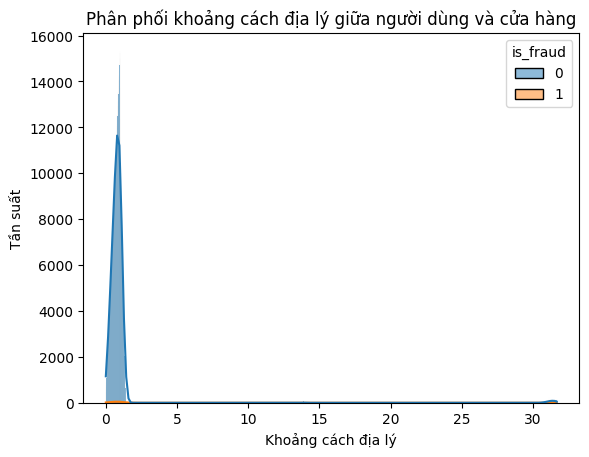

In [27]:
train_preprocessed_no_outliers['geo_distance'] = ((train_preprocessed_no_outliers['lat'] - train_preprocessed_no_outliers['merch_lat'])**2 + (train_preprocessed_no_outliers['long'] - train_preprocessed_no_outliers['merch_long'])**2)**0.5
sns.histplot(data=train_preprocessed_no_outliers, x='geo_distance', hue='is_fraud', kde=True)
plt.title('Phân phối khoảng cách địa lý giữa người dùng và cửa hàng')
plt.xlabel('Khoảng cách địa lý')
plt.ylabel('Tần suất')
plt.show()


Biểu đồ khác: Sự khác biệt giữa tọa độ người dùng (lat, long) và cửa hàng (merch_lat, merch_long)
Tính toán khoảng cách và phân tích.
Phân tích: Các giao dịch gian lận có khoảng cách địa lý lớn hơn không?

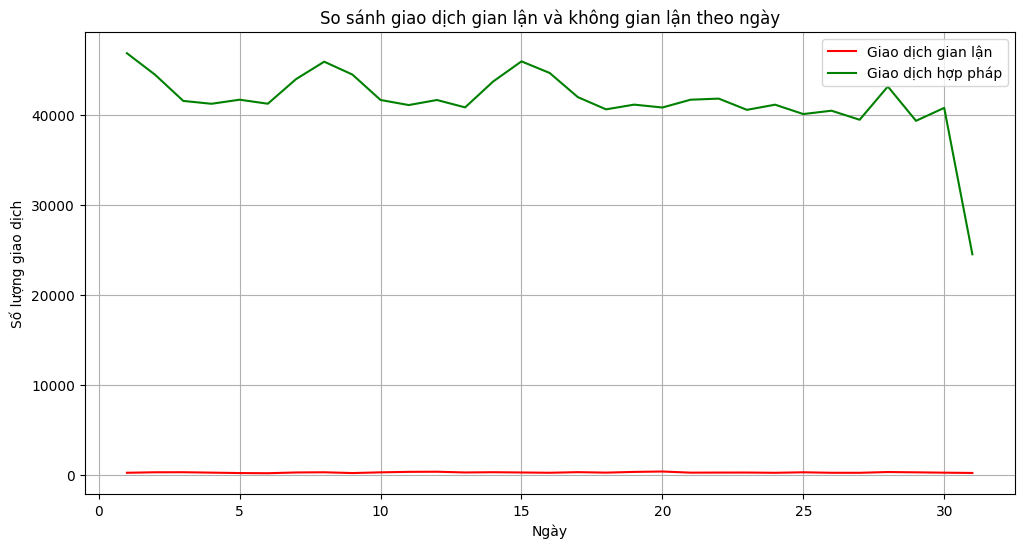

In [28]:
# Tần suất giao dịch gian lận và không gian lận theo ngày
fraud_transactions = train_preprocessed_no_outliers[train_preprocessed_no_outliers['is_fraud'] == 1].groupby('day').size()
non_fraud_transactions = train_preprocessed_no_outliers[train_preprocessed_no_outliers['is_fraud'] == 0].groupby('day').size()

# Biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(fraud_transactions, label='Giao dịch gian lận', color='red')
plt.plot(non_fraud_transactions, label='Giao dịch hợp pháp', color='green')
plt.title('So sánh giao dịch gian lận và không gian lận theo ngày')
plt.xlabel('Ngày')
plt.ylabel('Số lượng giao dịch')
plt.legend()
plt.grid()
plt.show()


Thách thức chính của tập dữ liệu này là làm thế nào để tìm ra được mô hình gian lận xảy ra từ một tập dữ liệu có sự mất cân bằng lớn.

#### Tóm tắt EDA và những thách thức chính
1. Phân bố lớp dữ liệu mất cân bằng: Với chỉ 1% giao dịch gian lận, đây là vấn đề lớn trong việc xây dựng mô hình. Các thuật toán tiêu chuẩn thường bị lệch về lớp chiếm ưu thế (non-fraud).
2. Không có mối tương quan mạnh: Ma trận tương quan không thể hiện rõ ràng mối quan hệ tuyến tính giữa các biến, đòi hỏi các kỹ thuật đặc thù hơn để phát hiện mẫu phi tuyến tính.
3. Dữ liệu thời gian: Tách các thông tin thời gian thành giờ, ngày, tháng, năm. Có thể khai thác thêm các đặc điểm tuần hoàn (sử dụng sin/cos) để mô hình hóa thời gian tốt hơn.
4. Ngoại lệ trong giá trị giao dịch: Mặc dù đã nhận thấy các giao dịch gian lận có thể xảy ra ở mọi mức tiền, các giao dịch với số tiền bất thường (rất cao hoặc rất thấp) vẫn là yếu tố đáng chú ý.


## 4. Xây Dựng và Đánh Giá Mô Hình
Phần này tập trung vào việc huấn luyện các mô hình học máy để phát hiện gian lận. Nhiều thuật toán sẽ được thử nghiệm và so sánh để xác định mô hình hiệu quả nhất.

- **Các mô hình thử nghiệm**:
  - Logistic Regression
  - Decision Trees
  - Random Forest
  - XGBoost

**Tối ưu hóa huấn luyện mô hình**
- Tạo hàm chung để huấn luyện: Giảm mã trùng lặp.
- Thêm Cross-Validation: Đánh giá mô hình toàn diện hơn.

**Đánh Giá Mô Hình**

Đánh giá hiệu suất của các mô hình bằng các chỉ số thích hợp và phương pháp kiểm tra chéo. Bước này sẽ xác định khả năng tổng quát của mô hình với dữ liệu chưa thấy.

- **Các chỉ số**:
  - Accuracy
  - Precision, Recall, and F1-Score
  - Confusion Matrix
  - ROC Curve and AUC
  - Precision-Recall Curve
---

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import IsolationForest
from sklearn.metrics import roc_curve

def train_and_evaluate(models, X_train, y_train, X_test, y_test):
    results = {}
    for name, model in models.items():
        # Huấn luyện mô hình
        model.fit(X_train, y_train)
        
        # Dự đoán
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
        
        # Đánh giá
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test,y_pred,average='weighted')
        f1 = f1_score(y_test,y_pred,average='weighted')
        recall= recall_score(y_test,y_pred,average='weighted')
        report = classification_report(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_prob,average='weighted') if y_prob is not None else 'N/A'
        
        # Lưu kết quả
        results[name] = {
            "accuracy": accuracy,
            "precision": precision,
            "recall": recall,
            "f1": f1,
            "roc_auc": roc_auc,
            "classification_report": report,
            "confusion_matrix": conf_matrix
        }
        
        # In kết quả
        print(f"\n{name} - Độ chính xác: {accuracy:.4f}")
        print(f"{name} - Độ chuẩn xác: {precision:.4f}")
        print(f"{name} - Độ nhạy: {recall:.4f}")
        print(f"{name} - F1-Score: {f1:.4f}")
        print(f"{name} - ROC AUC: {roc_auc}")
        print(f"{name} - Báo cáo phân loại:\n{report}")
        
        # Vẽ confusion matrix
        plt.figure(figsize=(6, 4))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                    xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
        plt.title(f'{name} - Ma trận nhầm lẫn')
        plt.show()
        
        # ROC Curve nếu có thể
        if y_prob is not None:
            fpr, tpr, thresholds = roc_curve(y_test, y_prob)
            plt.figure(figsize=(6, 4))
            plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{name} (AUC = {roc_auc:.2f})')
            plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'{name} - ROC Curve')
            plt.legend(loc="lower right")
            plt.show()

        # Phát hiện Outlier với Isolation Forest (nếu cần)
        outlier_model = IsolationForest(contamination=0.05)
        outliers = outlier_model.fit_predict(X_test)
        outliers = outliers == -1
        print(f"{name} - Số lượng ngoại lệ trong tập kiểm tra: {sum(outliers)}")
        
    return results


d:\Project\credit-card-fraud-detection\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Project\credit-card-fraud-detection\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Project\credit-card-fraud-detection\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i


Logistic Regression - Độ chính xác: 0.9961
Logistic Regression - Độ chuẩn xác: 0.9923
Logistic Regression - Độ nhạy: 0.9961
Logistic Regression - F1-Score: 0.9942
Logistic Regression - ROC AUC: 0.5314086754566256
Logistic Regression - Báo cáo phân loại:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719



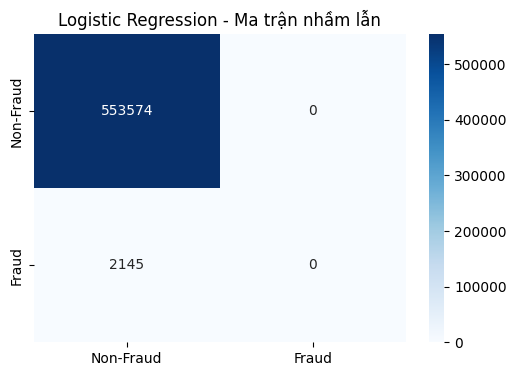

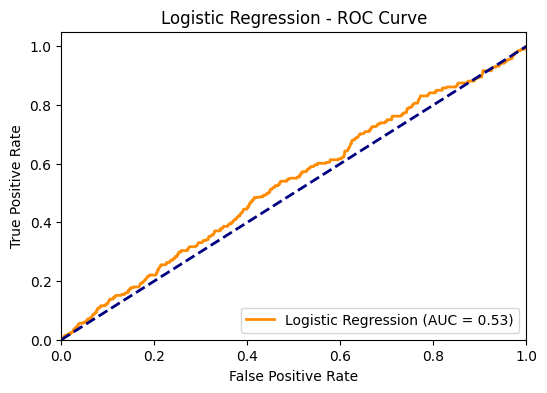

Logistic Regression - Số lượng ngoại lệ trong tập kiểm tra: 27786

Decision Tree - Độ chính xác: 0.9960
Decision Tree - Độ chuẩn xác: 0.9944
Decision Tree - Độ nhạy: 0.9960
Decision Tree - F1-Score: 0.9948
Decision Tree - ROC AUC: 0.5507996618843587
Decision Tree - Báo cáo phân loại:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.44      0.10      0.17      2145

    accuracy                           1.00    555719
   macro avg       0.72      0.55      0.58    555719
weighted avg       0.99      1.00      0.99    555719



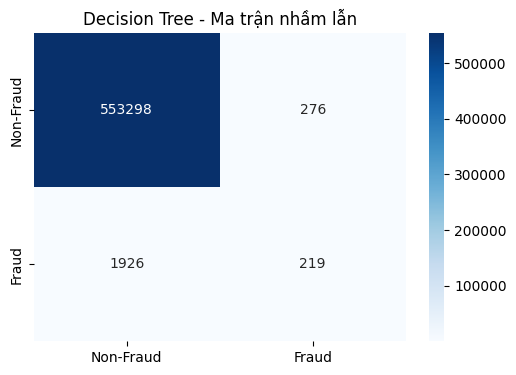

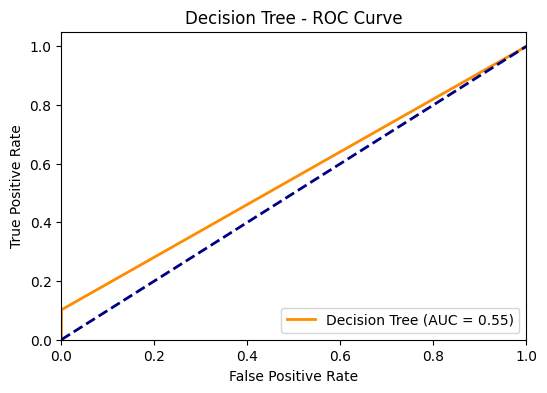

Decision Tree - Số lượng ngoại lệ trong tập kiểm tra: 27786

Random Forest - Độ chính xác: 0.9963
Random Forest - Độ chuẩn xác: 0.9963
Random Forest - Độ nhạy: 0.9963
Random Forest - F1-Score: 0.9947
Random Forest - ROC AUC: 0.8507693498513155
Random Forest - Báo cáo phân loại:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.98      0.05      0.09      2145

    accuracy                           1.00    555719
   macro avg       0.99      0.52      0.55    555719
weighted avg       1.00      1.00      0.99    555719



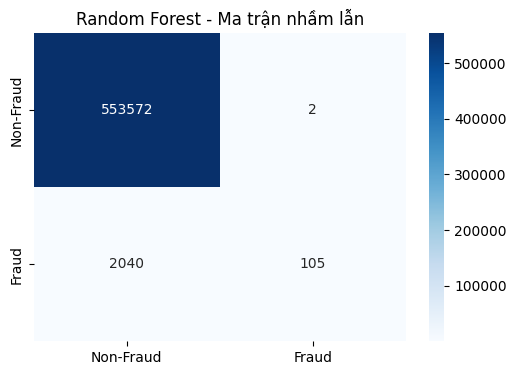

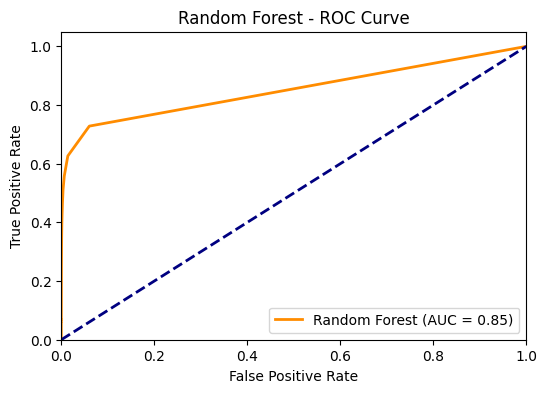

Random Forest - Số lượng ngoại lệ trong tập kiểm tra: 27786


d:\Project\credit-card-fraud-detection\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [03:06:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost - Độ chính xác: 0.9939
XGBoost - Độ chuẩn xác: 0.9935
XGBoost - Độ nhạy: 0.9939
XGBoost - F1-Score: 0.9937
XGBoost - ROC AUC: 0.7099888393811157
XGBoost - Báo cáo phân loại:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.17      0.15      0.16      2145

    accuracy                           0.99    555719
   macro avg       0.58      0.57      0.58    555719
weighted avg       0.99      0.99      0.99    555719



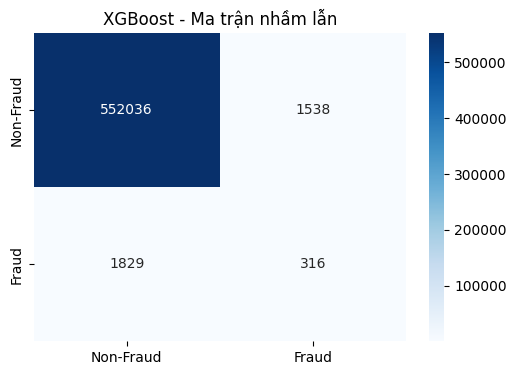

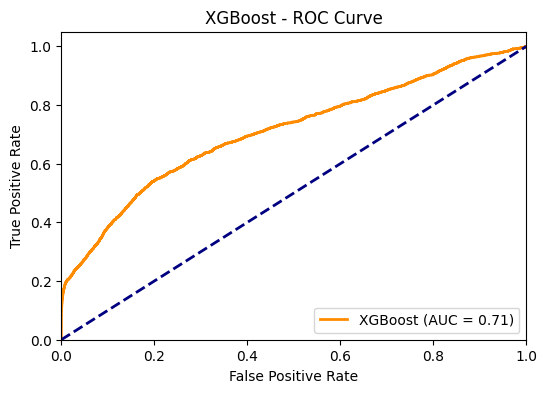

XGBoost - Số lượng ngoại lệ trong tập kiểm tra: 27786


In [30]:
# Danh sách mô hình
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Tính tỷ lệ giữa các lớp
ratio = train_preprocessed_no_outliers['is_fraud'].value_counts()[0] / train_preprocessed_no_outliers['is_fraud'].value_counts()[1]

models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=100, class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "XGBoost": XGBClassifier(random_state=42, scale_pos_weight=ratio, use_label_encoder=False, eval_metric='logloss')
}


# Huấn luyện và đánh giá
results1 = train_and_evaluate(models, X_train_original, y_train, X_test_original, y_test)



Logistic Regression - Độ chính xác: 0.8066
Logistic Regression - Độ chuẩn xác: 0.9932
Logistic Regression - Độ nhạy: 0.8066
Logistic Regression - F1-Score: 0.8894
Logistic Regression - ROC AUC: 0.6189223841078878
Logistic Regression - Báo cáo phân loại:
              precision    recall  f1-score   support

           0       1.00      0.81      0.89    553574
           1       0.01      0.38      0.02      2145

    accuracy                           0.81    555719
   macro avg       0.50      0.60      0.45    555719
weighted avg       0.99      0.81      0.89    555719



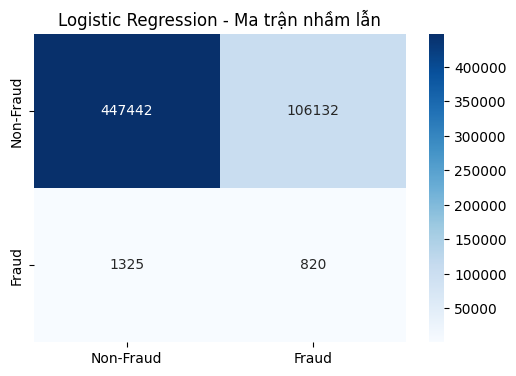

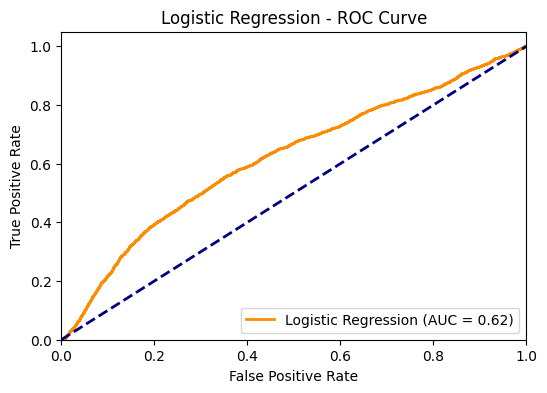

Logistic Regression - Số lượng ngoại lệ trong tập kiểm tra: 27786

Decision Tree - Độ chính xác: 0.9960
Decision Tree - Độ chuẩn xác: 0.9944
Decision Tree - Độ nhạy: 0.9960
Decision Tree - F1-Score: 0.9948
Decision Tree - ROC AUC: 0.5500994579634472
Decision Tree - Báo cáo phân loại:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.44      0.10      0.16      2145

    accuracy                           1.00    555719
   macro avg       0.72      0.55      0.58    555719
weighted avg       0.99      1.00      0.99    555719



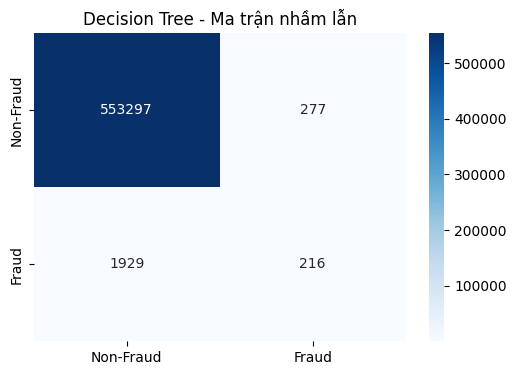

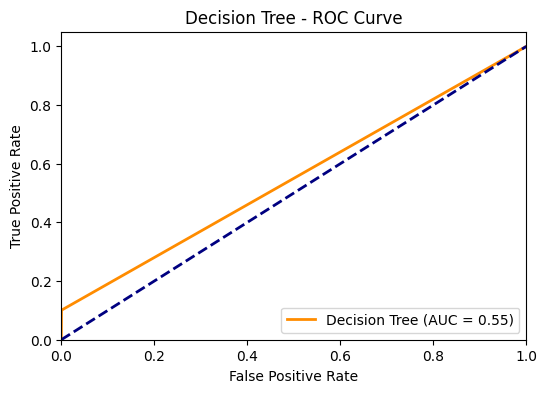

Decision Tree - Số lượng ngoại lệ trong tập kiểm tra: 27786

Random Forest - Độ chính xác: 0.9963
Random Forest - Độ chuẩn xác: 0.9963
Random Forest - Độ nhạy: 0.9963
Random Forest - F1-Score: 0.9947
Random Forest - ROC AUC: 0.8457745878208183
Random Forest - Báo cáo phân loại:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.98      0.05      0.09      2145

    accuracy                           1.00    555719
   macro avg       0.99      0.52      0.55    555719
weighted avg       1.00      1.00      0.99    555719



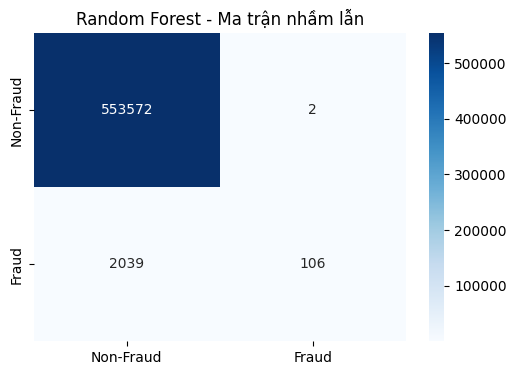

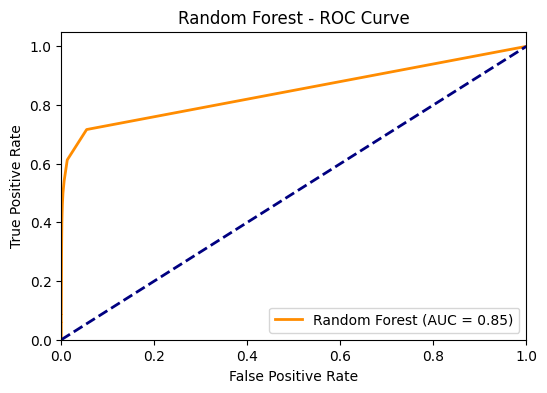

Random Forest - Số lượng ngoại lệ trong tập kiểm tra: 27786


d:\Project\credit-card-fraud-detection\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [03:21:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost - Độ chính xác: 0.9938
XGBoost - Độ chuẩn xác: 0.9935
XGBoost - Độ nhạy: 0.9938
XGBoost - F1-Score: 0.9937
XGBoost - ROC AUC: 0.757602016270234
XGBoost - Báo cáo phân loại:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.16      0.15      0.15      2145

    accuracy                           0.99    555719
   macro avg       0.58      0.57      0.58    555719
weighted avg       0.99      0.99      0.99    555719



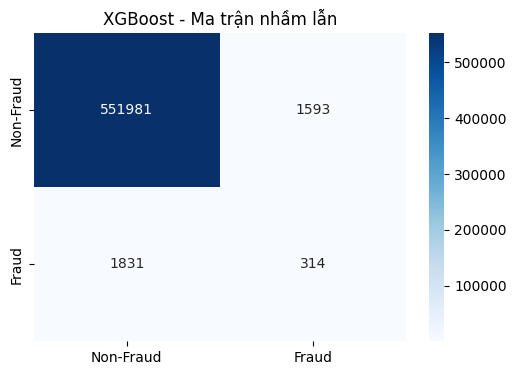

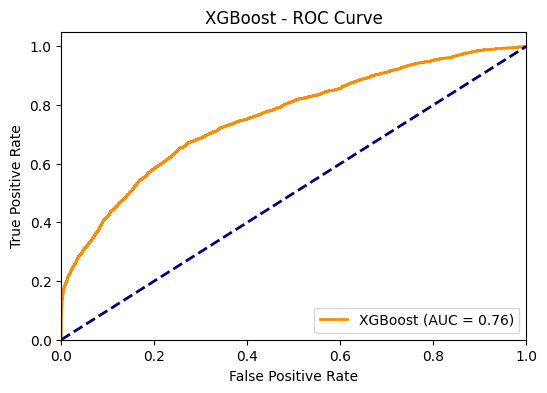

XGBoost - Số lượng ngoại lệ trong tập kiểm tra: 27786


In [31]:
results2 = train_and_evaluate(models, X_train_scaled, y_train, X_test_scaled, y_test)



Logistic Regression - Độ chính xác: 0.5637
Logistic Regression - Độ chuẩn xác: 0.9935
Logistic Regression - Độ nhạy: 0.5637
Logistic Regression - F1-Score: 0.7174
Logistic Regression - ROC AUC: 0.6142177827567676
Logistic Regression - Báo cáo phân loại:
              precision    recall  f1-score   support

           0       1.00      0.56      0.72    553574
           1       0.01      0.61      0.01      2145

    accuracy                           0.56    555719
   macro avg       0.50      0.59      0.37    555719
weighted avg       0.99      0.56      0.72    555719



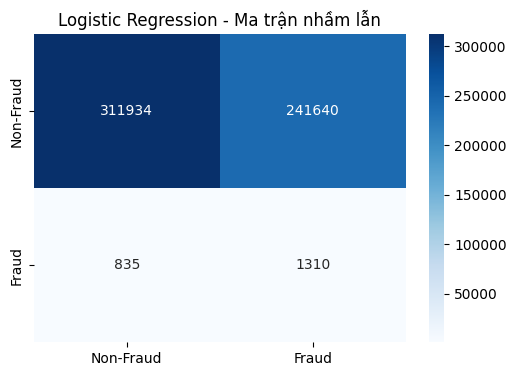

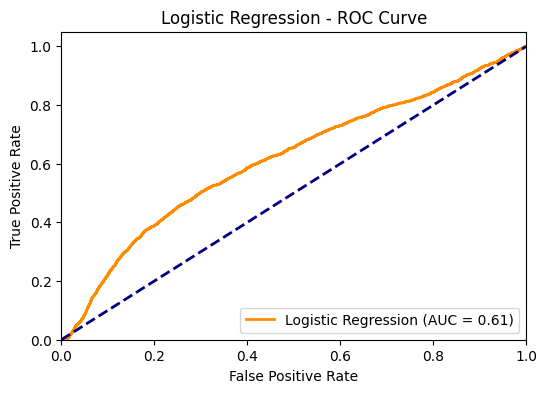

Logistic Regression - Số lượng ngoại lệ trong tập kiểm tra: 27786

Decision Tree - Độ chính xác: 0.9932
Decision Tree - Độ chuẩn xác: 0.9940
Decision Tree - Độ nhạy: 0.9932
Decision Tree - F1-Score: 0.9936
Decision Tree - ROC AUC: 0.6234515473988427
Decision Tree - Báo cáo phân loại:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.20      0.25      0.22      2145

    accuracy                           0.99    555719
   macro avg       0.60      0.62      0.61    555719
weighted avg       0.99      0.99      0.99    555719



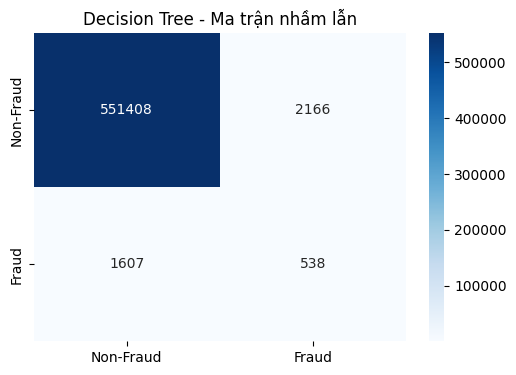

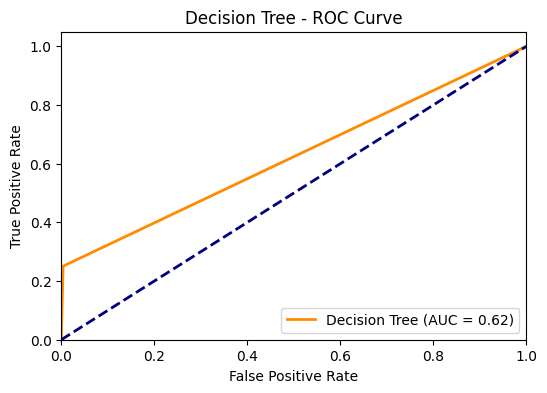

Decision Tree - Số lượng ngoại lệ trong tập kiểm tra: 27786

Random Forest - Độ chính xác: 0.9964
Random Forest - Độ chuẩn xác: 0.9962
Random Forest - Độ nhạy: 0.9964
Random Forest - F1-Score: 0.9949
Random Forest - ROC AUC: 0.8881328234834722
Random Forest - Báo cáo phân loại:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.94      0.07      0.14      2145

    accuracy                           1.00    555719
   macro avg       0.97      0.54      0.57    555719
weighted avg       1.00      1.00      0.99    555719



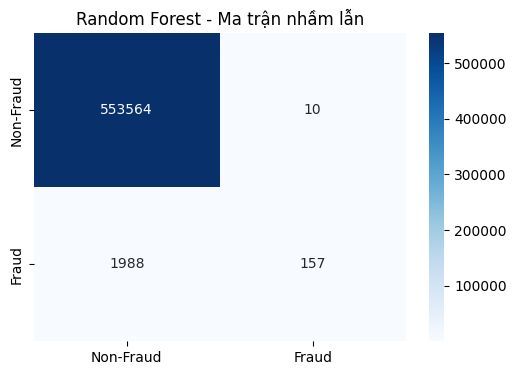

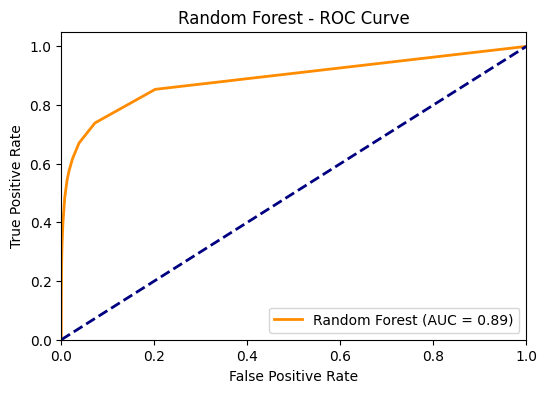

Random Forest - Số lượng ngoại lệ trong tập kiểm tra: 27786


d:\Project\credit-card-fraud-detection\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [04:00:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost - Độ chính xác: 0.9241
XGBoost - Độ chuẩn xác: 0.9953
XGBoost - Độ nhạy: 0.9241
XGBoost - F1-Score: 0.9570
XGBoost - ROC AUC: 0.921291772304645
XGBoost - Báo cáo phân loại:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96    553574
           1       0.04      0.76      0.07      2145

    accuracy                           0.92    555719
   macro avg       0.52      0.84      0.52    555719
weighted avg       1.00      0.92      0.96    555719



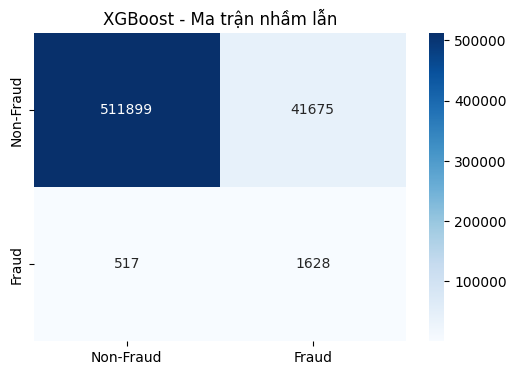

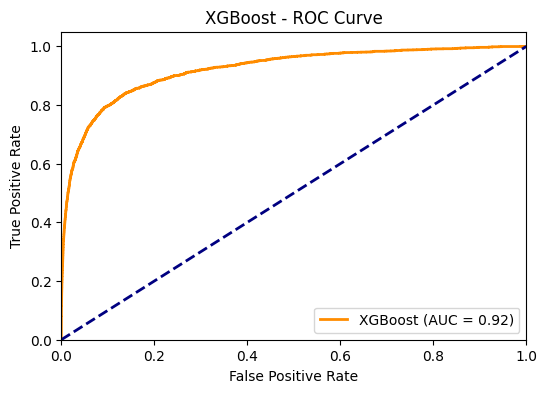

XGBoost - Số lượng ngoại lệ trong tập kiểm tra: 27786


In [32]:
results3 = train_and_evaluate(models, X_train_pca, y_train, X_test_pca, y_test)


## 5. Tối Ưu & Điều Chỉnh Mô Hình
Sau khi đánh giá các mô hình, chúng ta sẽ tối ưu hóa mô hình hoạt động tốt nhất để nâng cao khả năng dự đoán.

**1. Xử Lý Dữ Liệu Mất Cân Bằng**


- SMOTE-Tomek: Kết hợp SMOTE với phương pháp giảm dữ liệu không đồng nhất (Tomek Links). / dung cai nay


**2. Tinh Chỉnh Tham Số Mô Hình**

- RandomizedSearchCV: Dò tìm nhanh các kết hợp tham số trong một không gian được chỉ định. / dung cai nay


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
import numpy as np

# Sử dụng SMOTE để tạo dữ liệu cân bằng
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train_pca, y_train)

# Khởi tạo mô hình Logistic Regression
model = LogisticRegression(random_state=42, max_iter=100, class_weight='balanced')

# Định nghĩa không gian tham số
param_dist = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear', 'saga'],
    'l1_ratio': np.linspace(0, 1, 10)
}

# RandomizedSearchCV tìm tham số tối ưu
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=100, cv=5, random_state=42)
random_search.fit(X_res, y_res)

# In tham số tối ưu
print("Best parameters:", random_search.best_params_)

# Dự đoán và đánh giá mô hình
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_pca)
y_prob = best_model.predict_proba(X_test_pca)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Độ chính xác: {accuracy:.4f}")
print(f"Độ chuẩn xác: {precision:.4f}")
print(f"Độ nhạy: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")


d:\Project\credit-card-fraud-detection\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\Project\credit-card-fraud-detection\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\Project\credit-card-fraud-detection\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\Project\credit-card-fraud-detection\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\Project\credit-card-fraud-detection\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when pena

d:\Project\credit-card-fraud-detection\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:20:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Độ chính xác: 0.7836
Độ chuẩn xác: 0.9952
Độ nhạy: 0.7836
F1-Score: 0.8750
ROC AUC: 0.8644
Báo cáo phân loại:
              precision    recall  f1-score   support

           0       1.00      0.78      0.88    553574
           1       0.01      0.79      0.03      2145

    accuracy                           0.78    555719
   macro avg       0.51      0.79      0.45    555719
weighted avg       1.00      0.78      0.87    555719



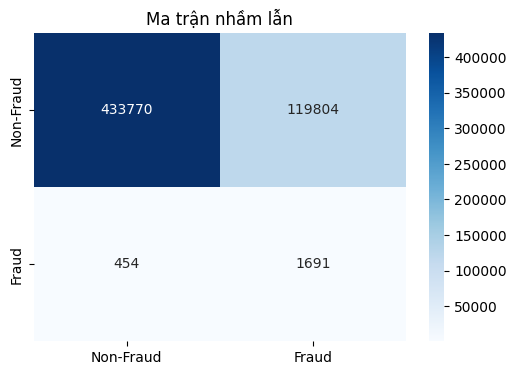

NameError: name 'roc_curve' is not defined

In [13]:
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Áp dụng SMOTE để cân bằng lớp
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_pca, y_train)

# Tạo mô hình XGBoost
model = XGBClassifier(
    n_estimators=100,       # Số lượng cây trong rừng
    learning_rate=0.1,      # Tốc độ học
    max_depth=3,            # Độ sâu tối đa của cây
    subsample=0.8,          # Tỷ lệ mẫu con
    colsample_bytree=0.8,   # Tỷ lệ các feature được sử dụng cho mỗi cây
    random_state=42,
    eval_metric='logloss',  # Đánh giá độ chính xác của mô hình
    use_label_encoder=False # Tắt cảnh báo "label_encoder"
)

# Huấn luyện mô hình
model.fit(X_train_smote, y_train_smote)

# Dự đoán
y_pred = model.predict(X_test_pca)
y_prob = model.predict_proba(X_test_pca)[:, 1]

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_prob)

# In kết quả
print(f"Độ chính xác: {accuracy:.4f}")
print(f"Độ chuẩn xác: {precision:.4f}")
print(f"Độ nhạy: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Báo cáo phân loại
print(f"Báo cáo phân loại:\n{classification_report(y_test, y_pred)}")

# Vẽ confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Ma trận nhầm lẫn')
plt.show()

# Vẽ ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [34]:
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Áp dụng SMOTE để cân bằng lớp
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_pca, y_train)

# Xác định các tham số cần tìm kiếm
param_grid = {
    'n_estimators': [50, 100, 200],      # Số lượng cây
    'learning_rate': [0.01, 0.1, 0.2],   # Tốc độ học
    'max_depth': [3, 4, 5],               # Độ sâu cây
    'subsample': [0.7, 0.8, 0.9],         # Tỷ lệ mẫu con
    'colsample_bytree': [0.7, 0.8, 0.9],  # Tỷ lệ các feature trong mỗi cây
}

# Tạo mô hình XGBoost
model = XGBClassifier(
    scale_pos_weight=ratio,  # Tỷ lệ cân bằng giữa các lớp nếu có dữ liệu mất cân bằng
    random_state=42,
    eval_metric='logloss',   # Đánh giá độ chính xác của mô hình
    use_label_encoder=False  # Tắt cảnh báo "label_encoder"
)

# Sử dụng GridSearchCV để tìm các tham số tốt nhất
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           scoring='roc_auc', cv=3, verbose=1, n_jobs=-1)

# Huấn luyện mô hình với các tham số tốt nhất
grid_search.fit(X_train_smote, y_train_smote)

# In các tham số tốt nhất
print(f"Best parameters: {grid_search.best_params_}")

# Dự đoán với mô hình tối ưu
y_pred = grid_search.best_estimator_.predict(X_test_pca)
y_prob = grid_search.best_estimator_.predict_proba(X_test_pca)[:, 1]

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_prob)

# In kết quả
print(f"Độ chính xác: {accuracy:.4f}")
print(f"Độ chuẩn xác: {precision:.4f}")
print(f"Độ nhạy: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Báo cáo phân loại
print(f"Báo cáo phân loại:\n{classification_report(y_test, y_pred)}")

# Vẽ confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Ma trận nhầm lẫn')
plt.show()

# Vẽ ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


AttributeError: 'super' object has no attribute '__sklearn_tags__'

### Giải thích các tham số trong mã

1. **Tham số trong mô hình:**
   - **Logistic Regression**:
     - `random_state=42`: Đảm bảo tính lặp lại của kết quả khi chia dữ liệu.
     - `max_iter=1000`: Số lần tối ưu mô hình, đảm bảo quá trình huấn luyện đủ số vòng lặp.
     - `class_weight='balanced'`: Điều chỉnh trọng số các lớp để xử lý dữ liệu không cân bằng, tức là tăng trọng số cho các lớp ít xuất hiện hơn.
   
   - **Decision Tree**:
     - `random_state=42`: Đảm bảo tính lặp lại của kết quả khi chia dữ liệu.
     - `class_weight='balanced'`: Điều chỉnh trọng số các lớp để xử lý dữ liệu không cân bằng.
     - Các tham số khác:
       - `max_depth`: Giới hạn độ sâu của cây quyết định để tránh overfitting.
       - `min_samples_split`: Số mẫu tối thiểu cần thiết để chia một node.
       - `min_samples_leaf`: Số mẫu tối thiểu tại mỗi lá (leaf node) để tránh overfitting.
   
   - **Random Forest**:
     - `random_state=42`: Đảm bảo tính lặp lại của kết quả khi chia dữ liệu.
     - `class_weight='balanced'`: Điều chỉnh trọng số các lớp để xử lý dữ liệu không cân bằng.
     - Các tham số khác:
       - `n_estimators`: Số lượng cây trong rừng.
       - `max_depth`: Giới hạn độ sâu của cây trong rừng.
       - `min_samples_split`: Số mẫu tối thiểu cần thiết để chia một node.
   
   - **XGBoost**:
     - `random_state=42`: Đảm bảo tính lặp lại của kết quả khi chia dữ liệu.
     - `use_label_encoder=False`: Tắt quá trình mã hóa nhãn trong XGBoost.
     - `eval_metric='logloss'`: Đánh giá mô hình với tiêu chí logloss.

2. **Tham số trong `RandomizedSearchCV`:**
   - **n_iter**: Số lượng thử nghiệm ngẫu nhiên (số lượng bộ tham số cần thử). Tăng số lần thử nghiệm có thể cải thiện kết quả tối ưu, nhưng cũng làm tăng thời gian chạy.
   - **scoring='f1'**: Sử dụng chỉ số F1-score để đánh giá hiệu suất mô hình.
   - **cv=3**: Sử dụng Cross-validation với 3 lần phân chia dữ liệu.
   - **n_jobs=-1**: Sử dụng tất cả các lõi của CPU để song song hóa các tác vụ, giúp tăng tốc quá trình huấn luyện.

3. **Các phương pháp cân bằng dữ liệu (`balancing_methods`):**
   - **SMOTE-Tomek**: Kết hợp SMOTE (Synthetic Minority Over-sampling Technique) và Tomek Links để tăng cường và làm sạch dữ liệu không cân bằng.
   - **Weight Balancing**: Không cần xử lý trước dữ liệu vì trọng số các lớp đã được điều chỉnh trong mô hình.

4. **Các tham số trong `param_grids`:**
   - Đây là các tham số bạn muốn thử nghiệm trong quá trình tối ưu hóa mô hình. Mỗi mô hình có các tham số khác nhau, ví dụ như `C`, `penalty`, `solver` đối với `LogisticRegression` hay `n_estimators`, `max_depth` đối với `RandomForest`.

### Tối ưu hóa thời gian

1. **Sử dụng `n_jobs=-1` trong `RandomizedSearchCV`:** Tham số này cho phép sử dụng tất cả các lõi của CPU để thực hiện việc huấn luyện mô hình song song, giúp giảm thời gian tính toán.

2. **Giảm số lượng vòng lặp trong `RandomizedSearchCV`:**
   - `n_iter=10`: Số lượng kết hợp tham số mà bạn muốn thử nghiệm. Tăng giá trị này sẽ cải thiện kết quả tối ưu nhưng cũng làm tăng thời gian chạy. Bạn có thể thử giảm xuống `n_iter=5` để tối ưu hóa thời gian.

3. **Giới hạn số lượng tham số trong `param_grids`:**
   - Đừng thử quá nhiều giá trị trong mỗi tham số. Ví dụ, đối với `RandomForest`, bạn có thể thử ít giá trị hơn cho `n_estimators` hoặc `max_depth`. Điều này giúp giảm số lượng thử nghiệm.

4. **Sử dụng `GridSearchCV` với chiến lược tìm kiếm thông minh:**
   - Nếu bạn biết một số tham số có khả năng cao giúp mô hình hoạt động tốt, bạn có thể thử với `GridSearchCV` thay vì `RandomizedSearchCV`. `GridSearchCV` sẽ thử tất cả các kết hợp có thể có, nhưng nếu phạm vi tham số được giới hạn tốt, thời gian sẽ ít bị ảnh hưởng.

5. **Tối ưu hóa bộ dữ liệu đầu vào:**
   - Trước khi áp dụng các phương pháp cân bằng, bạn có thể sử dụng một phương pháp như `StratifiedKFold` để chia dữ liệu một cách hợp lý, giúp tiết kiệm thời gian trong quá trình huấn luyện.

6. **Tối ưu hóa phương pháp cân bằng dữ liệu:**
   - Dùng `SMOTE-Tomek` hoặc `ADASYN` chỉ khi cần thiết. Nếu dữ liệu không quá mất cân bằng, bạn có thể bỏ qua bước này hoặc chỉ sử dụng các phương pháp đơn giản hơn như `NearMiss`.
